In [9]:
# Dependencies
import random
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import locale
from locale import atof
from pandas.plotting import scatter_matrix


In [ ]:
%matplotlib inline
master_stats_df = pd.read_csv('../Resources/Jan_2018.csv')
master_stats_df.fillna(value=0 , inplace=True)

unique_carrier_list = master_stats_df["UniqueCarrier"].unique()

Delay_df = master_stats_df[master_stats_df.DepDelayMinutes > 0]
beforetime_df = master_stats_df[master_stats_df.ArrDelay < 0]
cancelled_flights_df = master_stats_df[master_stats_df.Cancelled > 0]
diverted_flights_df = master_stats_df[master_stats_df.Diverted > 0]
#print(unique_carrier_list)
#Delay_df.count()

#print(master_stats_df.columns)
#print(master_stats_df.head(1))


In [ ]:
#master_stats_df["Distance"].mean()
#master_stats_df["AirTime"].mean()
airport_col = ['ID', 'Name', 'City', 'Country','Origin', 'ICAO', 'Lat', 'Long', 'Alt','Timezone', 'DST', 'Tz database time zone', 'type', 'source']
airport_df = pd.read_csv("airy.csv",
names = airport_col, index_col = 0)
#print(airport_df.head())
df2=pd.read_csv('airport.csv')

In [ ]:
df_lsq = pd.read_csv('./Master_Stats.csv', usecols=['Distance','AirTime'])
print(len(df_lsq))

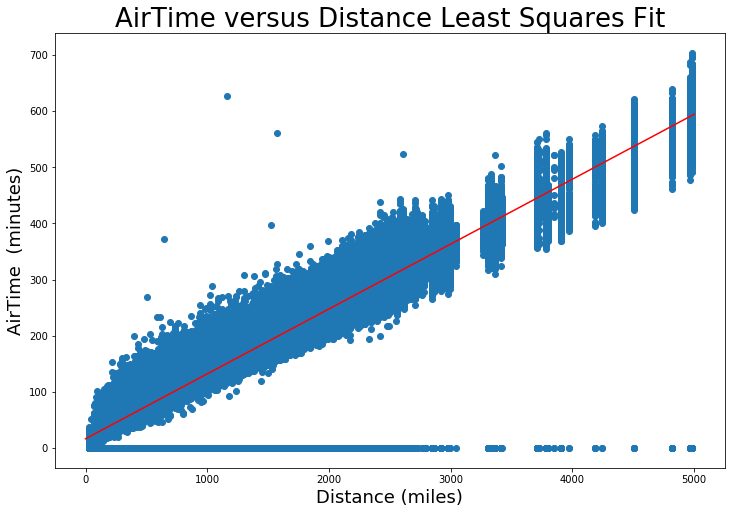

In [47]:
from numpy import arange,array,ones
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
#from matplotlib import pylab


x=df_lsq["Distance"]
y=df_lsq["AirTime"]

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)


xfit = np.linspace(0, 5000, 5000)
yfit = model.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylabel('AirTime  (minutes)',fontsize=18)
ax.set_xlabel('Distance (miles)',fontsize=18)
ax.set_title('AirTime versus Distance Least Squares Fit',fontsize=26)
plt.scatter(x, y)
plt.plot(xfit, yfit,c='r');


In [36]:

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_[1])



Model slope:     0.115589893807
Model intercept: 16.4776087314


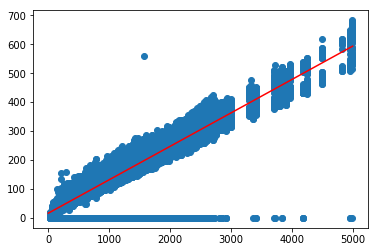

In [114]:
from numpy import arange,array,ones
from scipy import stats
from sklearn.linear_model import LinearRegression
#from matplotlib import pylab
day_df=day_df[["DepDelay","ArrDelay","AirTime","Distance","CarrierDelay","WeatherDelay"]][:2000]

x=master_stats_df["Distance"]
y=master_stats_df["AirTime"]

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 5000, 5000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,c='r');


In [110]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)


Model slope:     0.115437518613
Model intercept: 16.3367989873


## AirTime ~ 16.33 + 0.11 * Distance

##   Plane needs about 0.11 minutes to travel one mile, equivlean to ~ 60 / 0.11 = 522 miles per hour.

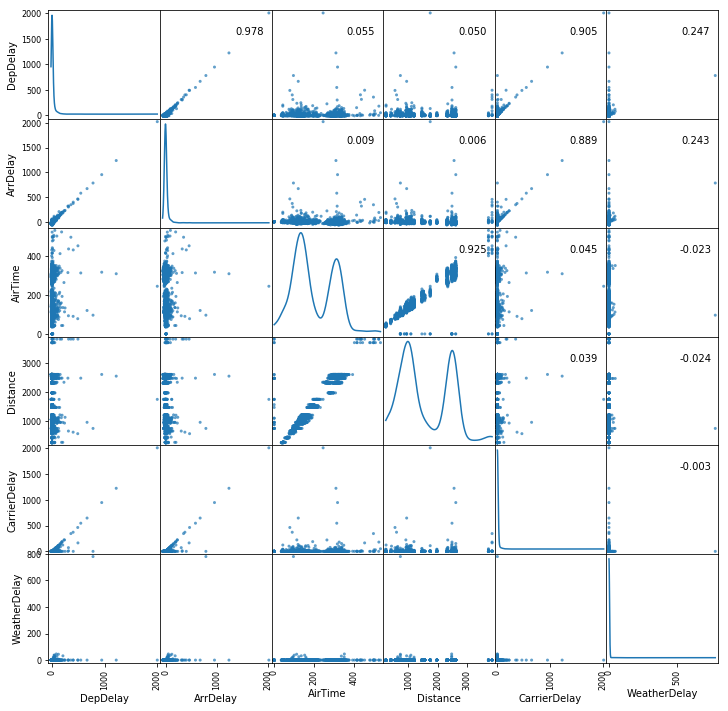

In [118]:
def plot_scatter_matrix(df_in):
    """"Plots a scatter matrix using pandas
    params:
    df_in = pandas frame to plot
    """
    fig = plt.figure()
    
    axes = scatter_matrix(df_in, alpha=0.7, figsize=(12, 12), diagonal='kde')

    corr = df_in.corr().as_matrix()
    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
    #plt.title("Distribution of data for 2000 value", fontsize=22, va= 'top', ha="center")    
    #sns.heatmap(df_in, annot=True)
    #save 
    #plt.savefig('Flights_Fig1.png', dpi=300, bbox_inches="tight")
    #plt.imshow(corr, cmap='cool', vmin=0, vmax=1)  
    plt.show()
#    fig,ax=subplot()
#plt.gca().invert_yaxis()   
plot_scatter_matrix(day_df)
plt.show()

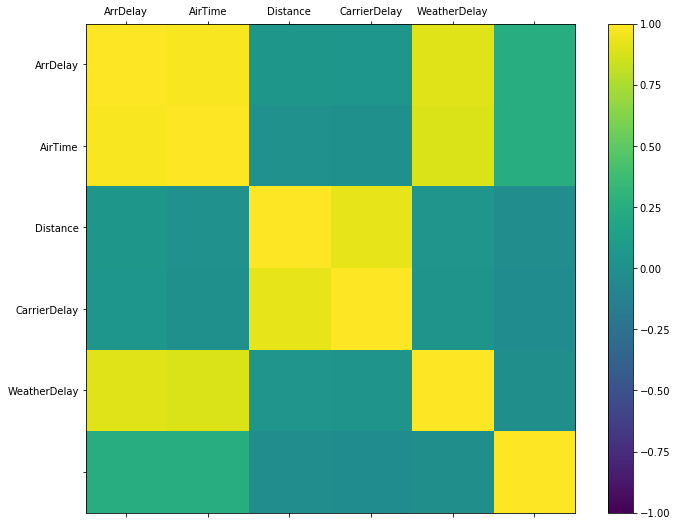

In [41]:
import random
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import locale
from locale import atof
from pandas.plotting import scatter_matrix

day_df=master_stats_df[["DepDelay","ArrDelay","AirTime","Distance","CarrierDelay","WeatherDelay"]][:2000]

#day_df.to_csv('a2000.csv')
names=["DepDelay","ArrDelay","AirTime","Distance","CarrierDelay","WeatherDelay"]
#data = pd.read_csv('a2000.csv', names=names,skiprows=0)
correlations = day_df.corr()
# plot correlation matrix
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
#ticks = numpy.arange(0,9,1)

#ax.set_xticks(ticks)
#ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

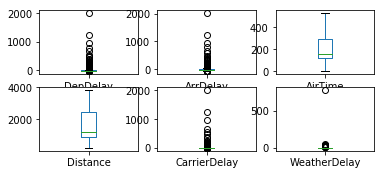

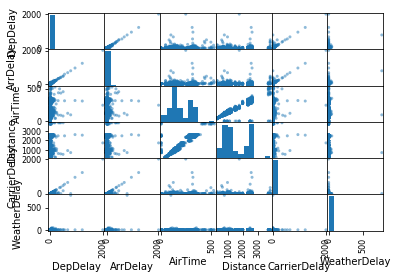

In [12]:
day_df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()
scatter_matrix(day_df)
plt.show()

In [36]:
airport_col = ['ID', 'Name', 'City', 'Country','IATA', 'ICAO', 'Lat', 'Long', 'Alt','Timezone', 'DST', 'Tz database time zone', 'type', 'source']
airport_df = pd.read_csv("airy.csv",names = airport_col, index_col = 0)
df1=master_stats_df['Origin'].unique()
airport_us = airport_df[(airport_df.Country == "United States")][['Name','Lat', 'Long', 'IATA', 'ICAO']]
#df2=airport_us['IATA'].unique()
df2 = airport_df['IATA'].unique().tolist()
#print(df2)
#newDF2 = airport_df.sort_values(airport_df.columns.unique())
#df1 = airport_df.drop_duplicates('IATA').unique()
#print(df2.head())
#print(df1.head())
#print(len(newDF))
#print(len(newDF2))
#len(df2)
import pandas as pd
#merged_Frame = pd.merge(df1,df2, on = id,how='inner')
# to find number of flights in and out of an airport
# it is similar to find number of rows in which each airport occur in either one of the 2 columns


In [37]:
carrier_group_df = master_stats_df.groupby("UniqueCarrier")

carrier_delay_group_df = Delay_df.groupby("UniqueCarrier")
#print(airline_group_df.count())
carrier_total_delay_df = carrier_delay_group_df["DepDelayMinutes"].sum()

#carrier_total_delay_df

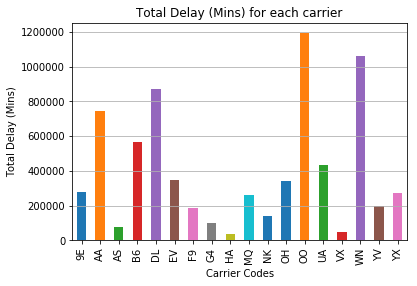

In [15]:
# Create a bar chart based off of the group series from before
count_chart = carrier_total_delay_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Carrier Codes")
count_chart.set_ylabel("Total Delay (Mins)")

plt.title("Total Delay (Mins) for each carrier")
plt.grid(axis='y')
plt.show()
plt.tight_layout()


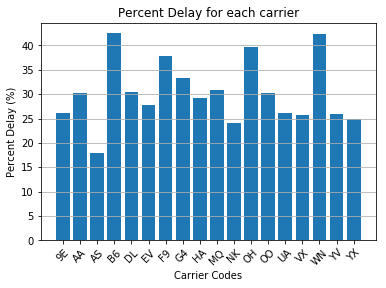

In [16]:
carrier_delay_per  = []

carrier_delay_per = [carrier_delay_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

# print(unique_carrier_list)
# print(carrier_delay_per)

plt.bar(unique_carrier_list,carrier_delay_per)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent Delay (%)")
plt.xticks(rotation = 45)

plt.title("Percent Delay for each carrier")
plt.grid(axis='y')
plt.show()
plt.tight_layout()
plt.show()

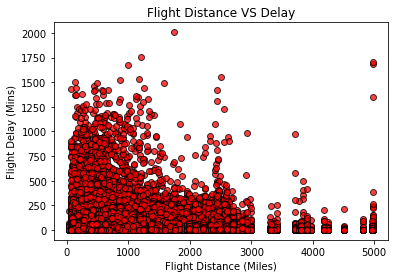

In [17]:
plt.scatter(master_stats_df["Distance"], master_stats_df["DepDelayMinutes"],marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.title("Flight Distance VS Delay")
plt.xlabel("Flight Distance (Miles)")
plt.ylabel("Flight Delay (Mins)")
plt.show()

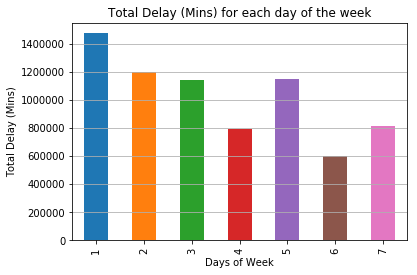

In [19]:
weekdays_df = Delay_df.groupby("DayOfWeek")["DepDelayMinutes"].sum()

# Create a bar chart based off of the group series from before
count_chart = weekdays_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Days of Week")
count_chart.set_ylabel("Total Delay (Mins)")

plt.title("Total Delay (Mins) for each day of the week")
plt.grid(axis='y')
plt.show()
plt.tight_layout()

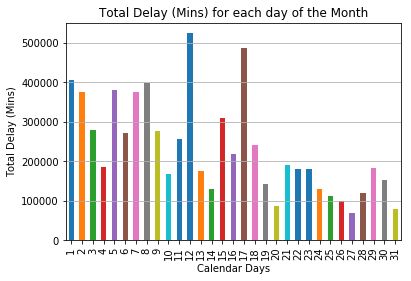

In [20]:
calendar_df = Delay_df.groupby("DayofMonth")["DepDelayMinutes"].sum()

# Create a bar chart based off of the group series from before
count_chart = calendar_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Calendar Days")
count_chart.set_ylabel("Total Delay (Mins)")

plt.title("Total Delay (Mins) for each day of the Month")
plt.grid(axis='y')
plt.show()
plt.tight_layout()

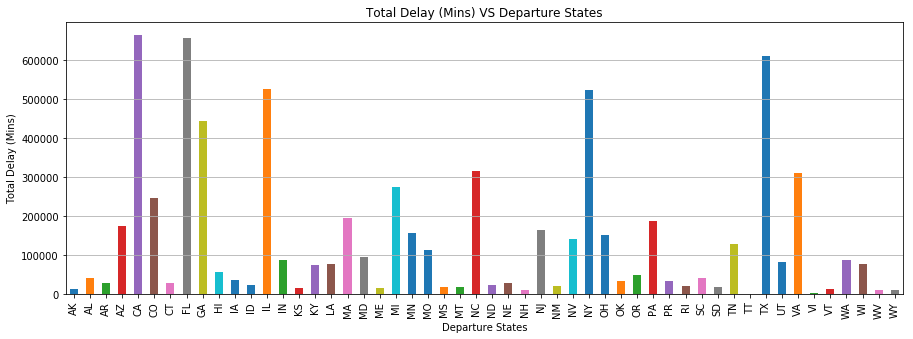

In [21]:

dep_city_df = Delay_df.groupby("OriginState")["DepDelayMinutes"].sum()

# Create a bar chart based off of the group series from before
count_chart = dep_city_df.plot(kind='bar', figsize= (15,5))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Departure States")
count_chart.set_ylabel("Total Delay (Mins)")

plt.title("Total Delay (Mins) VS Departure States")
plt.grid(axis='y')
plt.show()
plt.tight_layout()


In [ ]:
delay_reasons_df = Delay_df[["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]
delay_reasons_df.sum()

count_chart = delay_reasons_df.sum().plot(kind='bar', figsize= (7,5))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Delay Reasons")
count_chart.set_ylabel("Total Delay (Mins)")

plt.title("Total Delay (Mins) VS Delay Reasons")
plt.grid(axis='y')
plt.show()
plt.tight_layout()

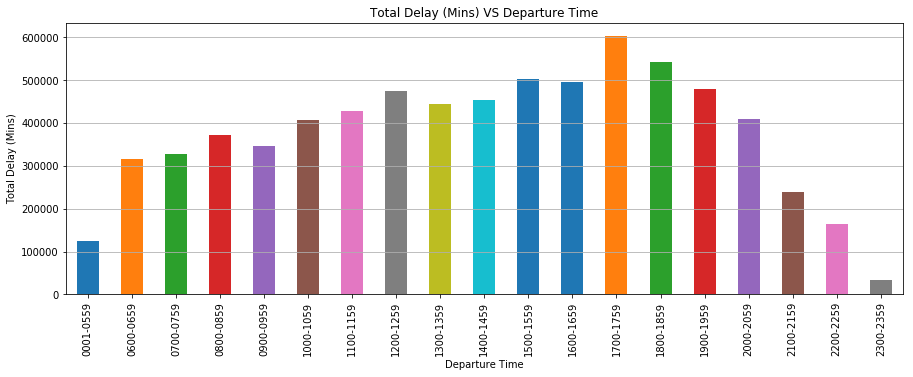

In [22]:
dep_timeblk_df = Delay_df.groupby("DepTimeBlk")["DepDelayMinutes"].sum()

# Create a bar chart based off of the group series from before
count_chart = dep_timeblk_df.plot(kind='bar', figsize= (15,5))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Departure Time")
count_chart.set_ylabel("Total Delay (Mins)")

plt.title("Total Delay (Mins) VS Departure Time")
plt.grid(axis='y')
plt.show()
plt.tight_layout()

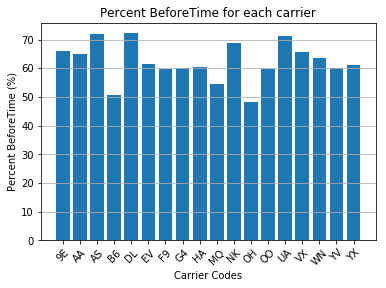

In [23]:
carrier_beforetime_group_df = beforetime_df.groupby("UniqueCarrier")
#print(airline_group_df.count())
carrier_total_beforetime_df = carrier_beforetime_group_df["ArrDelay"].sum()

carrier_bt_per  = []

carrier_bt_per = [carrier_beforetime_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

# print(unique_carrier_list)
# print(carrier_delay_per)

plt.bar(unique_carrier_list,carrier_bt_per)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent BeforeTime (%)")
plt.xticks(rotation = 45)

plt.title("Percent BeforeTime for each carrier")
plt.grid(axis='y')
plt.show()
plt.tight_layout()
plt.show()

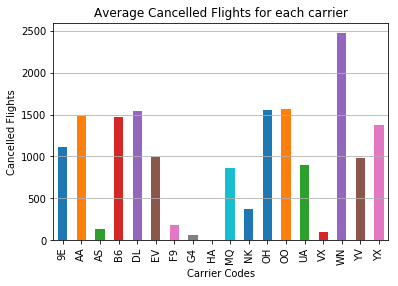

In [24]:
carrier_cancelled_group_df = cancelled_flights_df.groupby("UniqueCarrier")
#print(airline_group_df.count())
carrier_total_cancelled_df = carrier_cancelled_group_df["Cancelled"].sum()

count_chart = carrier_total_cancelled_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Carrier Codes")
count_chart.set_ylabel("Cancelled Flights")

plt.title("Average Cancelled Flights for each carrier")
plt.grid(axis='y')
plt.show()
plt.tight_layout()

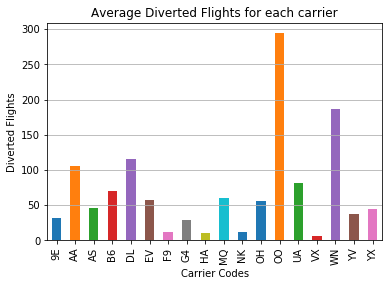

In [53]:
carrier_diverted_group_df = diverted_flights_df.groupby("UniqueCarrier")
#print(airline_group_df.count())
carrier_total_diverted_df = carrier_diverted_group_df["Diverted"].sum()

count_chart = carrier_total_diverted_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Carrier Codes")
count_chart.set_ylabel("Diverted Flights")

plt.title("Average Diverted Flights for each carrier")
plt.grid(axis='y')
plt.show()
plt.tight_layout()

In [26]:
master_stats_df.sort_values(by='ArrDelay', ascending=False)[:5]


,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,OriginCityName,OriginState,Dest,DestCityName,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1544,2018,1,11,4,AA,EGE,"Eagle, CO",CO,JFK,"New York, NY",...,0,252,268.0,244.0,1746,2007.0,0.0,16.0,0.0,0.0
20287,2018,1,2,2,AA,ORF,"Norfolk, VA",VA,DFW,"Dallas/Fort Worth, TX",...,0,224,250.0,175.0,1212,1752.0,0.0,26.0,0.0,0.0
78340,2018,1,3,3,HA,HNL,"Honolulu, HI",HI,JFK,"New York, NY",...,0,565,600.0,558.0,4983,35.0,1682.0,0.0,0.0,0.0
19409,2018,1,3,3,AA,SLC,"Salt Lake City, UT",UT,DFW,"Dallas/Fort Worth, TX",...,0,172,149.0,118.0,989,0.0,0.0,0.0,0.0,1648.0
282633,2018,1,9,2,AA,KOA,"Kona, HI",HI,LAX,"Los Angeles, CA",...,0,332,317.0,287.0,2504,1531.0,0.0,0.0,0.0,6.0


In [54]:
master_stats_df['diffelapstime']=master_stats_df['CRSElapsedTime']-master_stats_df['ActualElapsedTime']
master_stats_df.sort_values(by='diffelapstime', ascending=False)[:10]
#master_stats_df[['diffelapstime','Diverted','Cancelled']][:120]

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,OriginCityName,OriginState,Dest,DestCityName,...,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,diffelapstime
78372,2018,1,4,4,HA,JFK,"New York, NY",NY,HNL,"Honolulu, HI",...,690,0.0,0.0,4983,0.0,0.0,0.0,0.0,0.0,690.0
473851,2018,1,4,4,UA,EWR,"Newark, NJ",NJ,HNL,"Honolulu, HI",...,680,0.0,0.0,4962,0.0,0.0,0.0,0.0,0.0,680.0
482331,2018,1,3,3,UA,HNL,"Honolulu, HI",HI,EWR,"Newark, NJ",...,571,0.0,0.0,4962,0.0,0.0,0.0,0.0,0.0,571.0
694,2018,1,4,4,AA,DFW,"Dallas/Fort Worth, TX",TX,LIH,"Lihue, HI",...,532,0.0,0.0,3847,0.0,0.0,0.0,0.0,0.0,532.0
490214,2018,1,14,7,UA,DEN,"Denver, CO",CO,LIH,"Lihue, HI",...,477,0.0,0.0,3414,0.0,0.0,0.0,0.0,0.0,477.0
478425,2018,1,19,5,UA,DEN,"Denver, CO",CO,LIH,"Lihue, HI",...,477,0.0,0.0,3414,0.0,0.0,0.0,0.0,0.0,477.0
489481,2018,1,15,1,UA,OGG,"Kahului, HI",HI,ORD,"Chicago, IL",...,471,0.0,0.0,4184,0.0,0.0,0.0,0.0,0.0,471.0
470574,2018,1,6,6,UA,OGG,"Kahului, HI",HI,ORD,"Chicago, IL",...,471,0.0,0.0,4184,0.0,0.0,0.0,0.0,0.0,471.0
454944,2018,1,12,5,UA,OGG,"Kahului, HI",HI,ORD,"Chicago, IL",...,471,0.0,0.0,4184,0.0,0.0,0.0,0.0,0.0,471.0
484052,2018,1,2,2,UA,OGG,"Kahului, HI",HI,ORD,"Chicago, IL",...,471,0.0,0.0,4184,0.0,0.0,0.0,0.0,0.0,471.0


In [65]:
master_stats_df['delayed'] = master_stats_df['ArrDelay'].apply(lambda x: x > 0)
#print (master_stats_df['ArrDelay'].apply(lambda x: x > 0))

## doing perecnt delay year/month

In [84]:
import pandas as pd
import numpy as np
big_df=pd.read_csv('Master_Stats.csv', usecols=['Year','Month','UniqueCarrier','Origin','ArrDelay'])
big_df['delayed'] = big_df['ArrDelay'].apply(lambda x: x > 0)
#print(big_df.head())
big_nde=big_df['delayed'].value_counts()
big_dfd=big_df[['delayed','Origin','ArrDelay','Year','Month',]]
big_table = big_dfd.groupby(["Origin","delayed"]).size()\
          .unstack(fill_value=0)\
          .rename_axis(None, axis=1)\
          .reset_index()
big_table.columns = ['Origin', 'False', 'True']
per_list=list(big_table['True']/big_nde[1]  * 100)
my_big_list = big_table["Origin"].values

big_matrix = np.matrix([my_big_list,per_list])
df = pd.DataFrame(data=big_matrix)
big_dfdd=df.T
big_dfdd.columns=["Origin", "Percent"]

big_df2=pd.read_csv('airport.csv')

big_map_df=pd.merge(big_dfdd, big_df2, on="Origin")
big_map_df.to_csv('airport_loc_big.csv')


In [87]:
nd = big_df['delayed'].value_counts()[0]
print('not delayed = {}'.format(nd))
d = big_df['delayed'].value_counts()[1]
tf = nd+d
print ('Total flights = {}'.format(tf))
pot=nd/float(tf)*100
print ('Percent of on-time flights = {0:.1f}'.format(pot))

not delayed = 3942826
Total flights = 5962813
Percent of on-time flights = 66.1


/Users/ghassan/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


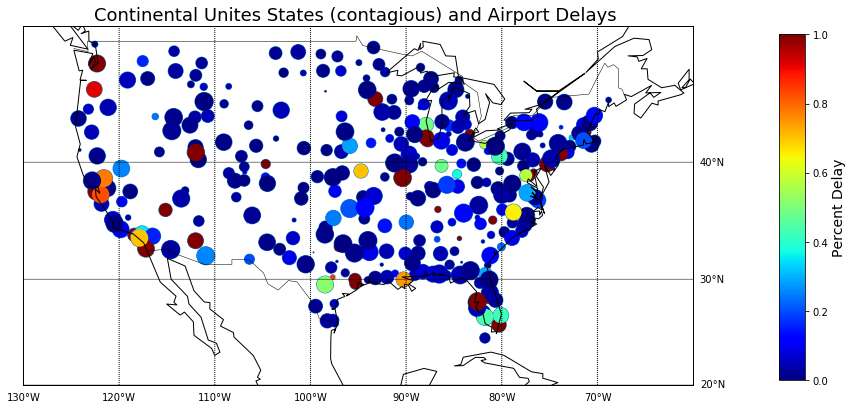

In [105]:
# Define the projection, scale, the corners of the map, and the resolution.
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import csv
plt.figure(figsize=(12,8))
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=50,llcrnrlon=-130,urcrnrlon=-60,lat_ts=10,resolution='c')
m.drawcoastlines()
m.drawcountries()
#m.drawstates()
# draw parallels and meridians.
parallels = np.arange(20.,60.,10.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-130.,-60.,10.)
m.drawmeridians(meridians,labels=[True,False,False,True])
m.drawmapboundary(fill_color='white')
plt.title("Continental Unites States (contagious) and Airport Delays ", fontsize=18)
# Color the transformed points!
lats,lons,names,percent = [],[],[],[]

with open('airport_loc_big.csv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        names.append(data['Origin'])
        lats.append(float(data['Lat']))
        lons.append(float(data['Long']))
        percent.append(float(data['Percent']))
        
x,y =m(lons,lats)
s = [n for n in range(len(percent))]


plt.scatter(x,y,s=s)
sc=plt.scatter(x,y, c=big_map_df['Percent'], vmin=0, vmax =1, cmap=cm.jet, s=s, edgecolors='none')# And let's include that colorbar
cax = plt.axes([1.0, 0.2, 0.030, 0.6])
clb=plt.colorbar(sc,cax=cax)
clb.set_label('Percent Delay', fontsize=14 )
plt.savefig("ww_temp_dist_big.png", dpi = 100)
plt.show()


In [ ]:
 df.groupby(pd.Grouper(freq='M'))